#도시철도 전동차 광고 활성화를 통한 수익 증대 전략


*   주제 선정 이유
  - 전동차 지류 광고 물량의 80% 이상이 놀고 있음.
  - 역구내 광고에 비해 훨씬 저렴하고 특정 위치에 고정되어 있지 않아
  여러 측면에서 접근성이 좋은 전동차 광고를 방치해두기는 너무 아까움.

*   전동차 광고 활성화 전략 -> "개인도 쉽게 접근할 수 있는 저렴한 일일 광고 옵션"
  - 일반인들이 적극 참여할 수 있는 독특한 테마의 광고
  - 세부 활용 방안 1: 대전 방문 지인을 위한 환영 광고
  - 세부 활용 방안 2: 지하철로 출퇴근하는 지인을 위한 생일 축하 광고
  - 세부 활용 방안 3: 군 제대한 지인을 위한 제대 축하 광고
  - 세부 활용 방안 4: 축구 팬들의 선수 응원 광고

*   기대효과
  - 광고 수익 증가
  - 도시철도 고객들에게 이색 체험 제공
  - 대전광역시 도시철도 홍보 및 이용객 유치

#패키지 설치 및 불러오기

In [ ]:
!pip install koreanize-matplotlib
!apt-get -qq install -y fonts-nanum > /dev/null

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

import koreanize_matplotlib

# 함수 정의

In [ ]:
# 파이차트의 항목 + 퍼센트 라벨 생성 함수
def make_labels(values, labels):
    total = sum(values)
    return [f"{label}\n{(v/total)*100:.1f}%" for label, v in zip(labels, values)]

# 파이차트 내부에 상세 건수를 표시하기 위한 함수
def make_autopct_cases(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val:,}건' # 천 단위에 쉼표 넣는 형식
    return my_autopct

# y축 표시 형식 변경을 위한 함수(만 단위로)
def format_kor_unit(x, pos):
    return f'{int(x/10000)}만'

#대전교통공사 도시철도 광고 관련 자료

##대전교통공사 광고사업 현황
- 출처: https://www.data.go.kr/data/15090180/fileData.do


###광고 물량 비율

In [ ]:
# 파일 경로
file_path = '/content/대전교통공사_광고사업현황_20240816.csv'

# 데이터 읽기
df_ad = pd.read_csv(file_path, encoding = 'cp949')
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종류       10 non-null     object 
 1   구 분      10 non-null     object 
 2   세부 구분    10 non-null     object 
 3   규 격(cm)  10 non-null     object 
 4    전동차     4 non-null      float64
 5   판암       6 non-null      float64
 6   신흥       6 non-null      float64
 7   대동       6 non-null      float64
 8   대전       6 non-null      float64
 9   중앙로      6 non-null      float64
 10  중구청      6 non-null      float64
 11  서대전4     6 non-null      float64
 12  오룡       6 non-null      float64
 13  용문       6 non-null      float64
 14  탄방       6 non-null      float64
 15  시청       6 non-null      float64
 16  정부청사     6 non-null      float64
 17  갈마       6 non-null      float64
 18  월평       6 non-null      float64
 19  갑천       6 non-null      float64
 20  유성온천     6 non-null      float64
 21  구암       6 non-null

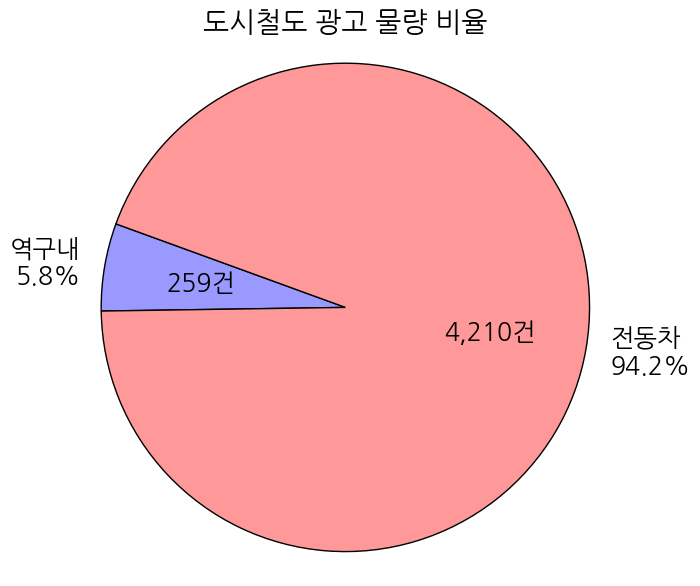

In [ ]:
# 광고 물량이 있는 열만 선택
ad_cols = df_ad.select_dtypes(include = 'number').columns

# 종류 열을 기준으로 합산
s_total = df_ad.groupby('종류')[ad_cols].sum().sum(axis = 1)

# 파이차트 그리기
plt.figure(figsize = (6, 6))
plt.rc('font', family = 'NanumGothic')
plt.pie(s_total,
        labels = make_labels(s_total.values, s_total.index),
        colors = [(0.6, 0.6, 1), (1, 0.6, 0.6)],
        startangle = 160,
        labeldistance = 1.1,
        wedgeprops = {'edgecolor': 'black', 'linewidth': 1}, # 윤곽선
        autopct = make_autopct_cases(s_total.values),
        textprops = {'fontsize': 18})

plt.title('도시철도 광고 물량 비율', fontsize = 20)
plt.subplots_adjust(top = 0.2) # 제목을 파이차트와 더 가깝게

plt.axis('equal') # 원이 찌그러지지 않게

plt.tight_layout()

plt.show()

##대전교통공사 부대사업 매출(2015년 - 2024년)
- 출처: https://www.data.go.kr/data/15137389/fileData.do

In [ ]:
# 파일 경로
file_path = '/content/대전교통공사_부대사업매출내역_20240919.csv'

# 데이터 읽기
df_sales = pd.read_csv(file_path, encoding = 'cp949')
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25816 entries, 0 to 25815
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고지시작일   25816 non-null  object
 1   고지종료일   25816 non-null  object
 2   계약 종류   25816 non-null  object
 3   계약 금액   25816 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 806.9+ KB


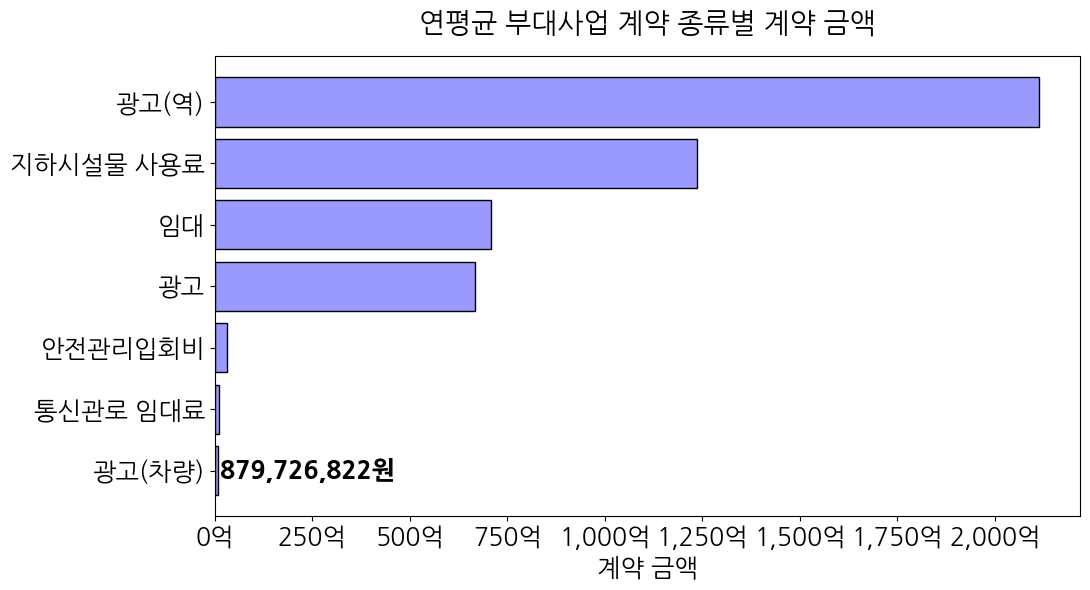

In [ ]:
# 2015-2024 계약 종류별 계약 금액 합산
s_totals = df_sales.groupby('계약 종류')['계약 금액'].sum()

# 연평균 계약 금액
s_avs = round(s_totals / 10)
df_avs = s_avs.to_frame().reset_index()
df_avs.columns = ['계약 종류', '계약 금액']
df_avs = df_avs.sort_values(by = '계약 금액').reset_index()

# 바 차트 그리기
plt.figure(figsize = (11, 6))
plt.rc('font', family = 'NanumGothic')
plt.barh(df_avs['계약 종류'], df_avs['계약 금액'], color = (0.6, 0.6, 1),
         edgecolor = 'black', linewidth = 1)
plt.xlabel('계약 금액', fontsize = 18)
plt.title('연평균 부대사업 계약 종류별 계약 금액', fontsize = 20, pad = 18)

# x축 포맷팅(억 단위로)
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1e8):,}억')
plt.gca().xaxis.set_major_formatter(formatter)

# 광고(차량) 막대에 상세 금액 표시
target_idx = df_avs.index[df_avs['계약 종류'] == '광고(차량)'][0]
amount = df_avs.loc[target_idx, '계약 금액']
plt.text(amount + 5e8, target_idx, f'{int(amount):,}원',
         va = 'center', fontsize = 18, color = 'black', fontweight='bold')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.tight_layout()

plt.show()

주) 데이터 출처에서 계약 종류에 대한 설명 찾을 수 없음. -> 그냥 '광고' 항목에 뭐가 포함되는지 알 수 없음.

##대전교통공사 전동차 광고 계약 현황
- 출처: https://www.djtc.kr/kor/adList2.do?menuIdx=704

In [ ]:
# 파일 경로
file_path = '/content/대전교통공사_광고계약현황_20250709.csv'

# 데이터 읽기
df_contract = pd.read_csv(file_path, skiprows = 2)

# 잔여 물량 열 추가
df_contract['잔여물량'] = df_contract['전체물량'] - df_contract['계약물량']
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광고종류      3 non-null      object 
 1   가로규격(cm)  3 non-null      int64  
 2   세로규격(cm)  3 non-null      int64  
 3   월광고료(원)   3 non-null      int64  
 4   전체물량      3 non-null      int64  
 5   계약물량      3 non-null      int64  
 6   계약진행율(%)  3 non-null      float64
 7   잔여물량      3 non-null      int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 324.0+ bytes


### 액자 광고 계약 진행율

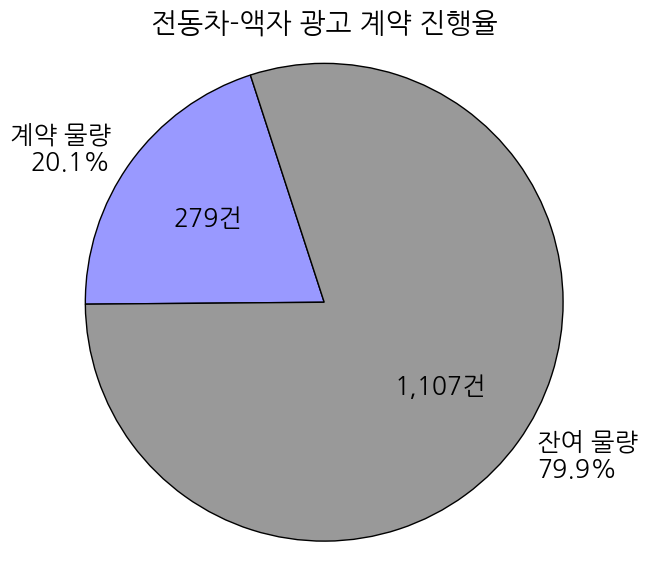

In [ ]:
s_frameAd = df_contract.loc[0, ['계약물량', '잔여물량']]
s_frameAd.index = ['계약 물량', '잔여 물량']

# 파이차트 그리기
plt.figure(figsize = (6, 6))
plt.rc('font', family = 'NanumGothic')
plt.pie(s_frameAd,
        labels = make_labels(s_frameAd.values, s_frameAd.index),
        colors = [(0.6, 0.6, 1), (0.6, 0.6, 0.6)],
        startangle = 108,
        labeldistance = 1.1,
        wedgeprops = {'edgecolor': 'black', 'linewidth': 1}, # 윤곽선
        autopct = make_autopct_cases(s_frameAd.values),
        textprops = {'fontsize': 18})

plt.title('전동차-액자 광고 계약 진행율', fontsize = 20)
plt.subplots_adjust(top = 0.2)

plt.axis('equal')

plt.tight_layout()

plt.show()

###상단 광고 계약 진행율

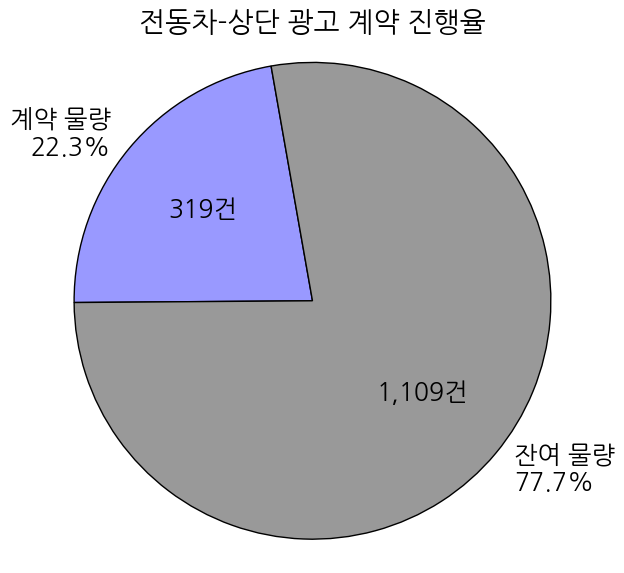

In [ ]:
s_topAd = df_contract.loc[1, ['계약물량', '잔여물량']]
s_topAd.index = ['계약 물량', '잔여 물량']

# 파이차트 그리기
plt.figure(figsize = (6, 6))
plt.rc('font', family = 'NanumGothic')
plt.pie(s_topAd,
        labels = make_labels(s_topAd.values, s_topAd.index),
        colors = [(0.6, 0.6, 1), (0.6, 0.6, 0.6)],
        startangle = 100,
        labeldistance = 1.1,
        wedgeprops = {'edgecolor': 'black', 'linewidth': 1}, # 윤곽선
        autopct = make_autopct_cases(s_topAd.values),
        textprops = {'fontsize': 18})

plt.title('전동차-상단 광고 계약 진행율', fontsize = 20)
plt.subplots_adjust(top = 0.2)

plt.axis('equal')

plt.tight_layout()

plt.show()

###노선도 광고 계약진행율

In [ ]:
s_mapAd = df_contract.loc[2, ['계약물량', '잔여물량']]
s_mapAd.index = ['계약 물량', '잔여 물량']

# 파이차트 그리기
plt.figure(figsize = (6, 6))
plt.rc('font', family = 'NanumGothic')
plt.pie(s_mapAd,
        labels = make_labels(s_mapAd.values, s_mapAd.index),
        colors = [(0.6, 0.6, 1), (0.6, 0.6, 0.6)],
        startangle = 142,
        labeldistance = 1.1,
        wedgeprops = {'edgecolor': 'black', 'linewidth': 1}, # 윤곽선
        autopct = make_autopct_cases(s_mapAd.values),
        textprops = {'fontsize': 18})

plt.title('전동차-노선도 광고 계약 진행율', fontsize = 20)
plt.subplots_adjust(top = 0.2)

plt.axis('equal')

plt.tight_layout()

plt.show()

#대전광역시 월별 방문객 수(2023년 1월 - 2025년 5월)
- 출처: https://datalab.visitkorea.or.kr/datalab/portal/loc/getAreaDataForm.do?SGG_CD=30#

In [ ]:
# 파일 경로
file_path = '/content/202301-202505_방문자 수(연인원) 추이.csv'

# 데이터 읽기
df_DJmonthly = pd.read_csv(file_path)
df_DJmonthly

# 필요한 열만 남기기
df_DJmonthly = df_DJmonthly[['기준년월', '방문자수']]

# 기준년월(yyyymm) -> 년과 월 분리
df_DJmonthly['년'] = df_DJmonthly['기준년월'].astype(str).str[:4].astype(int)
df_DJmonthly['월'] = df_DJmonthly['기준년월'].astype(str).str[4:].astype(int)

# 피벗 테이블로 재구성
df_DJmonthly = df_DJmonthly.pivot(index='년', columns='월', values='방문자수')

# 컬럼명 변경('1월', '2월', ...)
df_DJmonthly.columns = [f'{month}월' for month in df_DJmonthly.columns]
df_DJmonthly

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
년,,,,,,,,,,,,
2023,6835395.0,6167549.0,7722176.0,6231011.0,6633007.0,6603320.0,6724263.0,6901016.0,7443037.0,7162844.0,6487950.0,7097769.0
2024,6595099.0,7114789.0,8228962.0,6436209.0,7160968.0,6725747.0,6913697.0,7173197.0,7723915.0,6889806.0,6779321.0,6898195.0
2025,7260613.0,6460639.0,8171159.0,6651666.0,8580281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


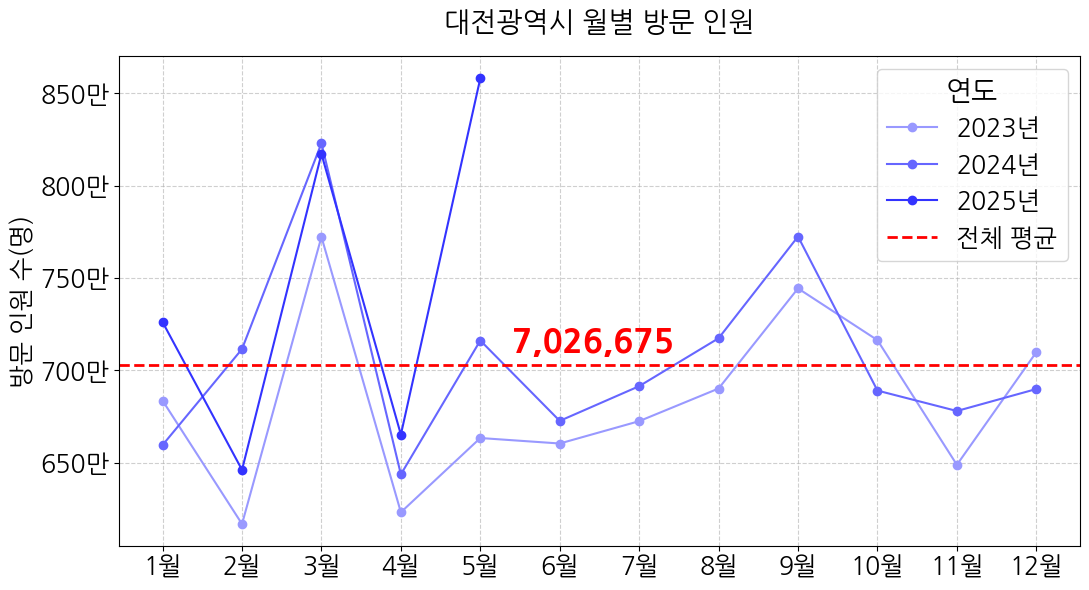

In [ ]:
plt.figure(figsize=(11, 6))
plt.rc('font', family='NanumGothic')

colors = [(0.6, 0.6, 1), (0.4, 0.4, 1), (0.2, 0.2, 1)]

# 각 연도별로 꺾은선 그래프 그리기
for i, year in enumerate(df_DJmonthly.index):
    plt.plot(df_DJmonthly.columns, df_DJmonthly.loc[year], marker='o', label=f'{year}년', color = colors[i])

plt.title('대전광역시 월별 방문 인원', fontsize = 20, pad = 18)
plt.ylabel('방문 인원 수(명)', fontsize = 18)
plt.xticks(fontsize = 18, rotation = 0)
plt.yticks(fontsize = 18)

# 전체 평균 선 그리기
overall_avg = np.nanmean(df_DJmonthly.values)
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=2, label='전체 평균')
plt.text(len(df_DJmonthly.columns) - 7.6, overall_avg + 80000,
         f'{int(overall_avg):,}', color = 'red', fontsize = 24, fontweight = 'bold')

plt.grid(True, linestyle = '--', alpha = 0.6)
plt.legend(title = '연도', title_fontsize = 20, fontsize = 18) # 범례

# y축에 포맷터 적용(만 단위로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kor_unit))

plt.tight_layout()
plt.show()

#대전교통공사 도시철도 이용 관련 자료
- 출처: https://afcdb.djtc.kr/AGM_Traffic

###대전광역시 도시철도 월별 통행량(2023년 1월 - 2025년 5월)

In [ ]:
# 파일 경로
file_path = '/content/대전지하철_월별승차_연도별피벗.csv'

# 데이터 읽기
df_traffic = pd.read_csv(file_path)
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연도      3 non-null      int64
 1   1월      3 non-null      int64
 2   2월      3 non-null      int64
 3   3월      3 non-null      int64
 4   4월      3 non-null      int64
 5   5월      3 non-null      int64
 6   6월      3 non-null      int64
 7   7월      3 non-null      int64
 8   8월      3 non-null      int64
 9   9월      3 non-null      int64
 10  10월     3 non-null      int64
 11  11월     3 non-null      int64
 12  12월     3 non-null      int64
dtypes: int64(13)
memory usage: 444.0 bytes


In [ ]:
# 월 승차 열 이름 리스트
month_cols = [f'{i}월' for i in range(1, 13)]

# 0 -> NAN으로 바꾸기
df_traffic.replace(0, np.nan, inplace = True)

df_traffic.set_index('연도', inplace = True)
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2023 to 2025
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1월      3 non-null      int64  
 1   2월      3 non-null      int64  
 2   3월      3 non-null      int64  
 3   4월      3 non-null      int64  
 4   5월      3 non-null      int64  
 5   6월      2 non-null      float64
 6   7월      2 non-null      float64
 7   8월      2 non-null      float64
 8   9월      2 non-null      float64
 9   10월     2 non-null      float64
 10  11월     2 non-null      float64
 11  12월     2 non-null      float64
dtypes: float64(7), int64(5)
memory usage: 312.0 bytes


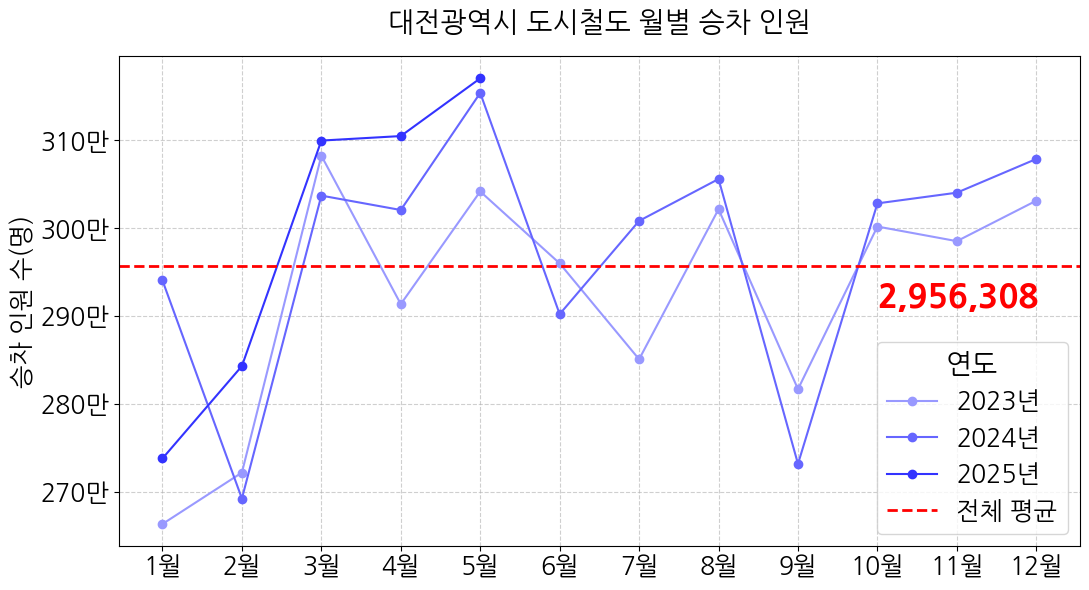

In [ ]:
plt.figure(figsize=(11, 6))
plt.rc('font', family='NanumGothic')

colors = [(0.6, 0.6, 1), (0.4, 0.4, 1), (0.2, 0.2, 1)]

# 각 연도별로 꺾은선 그래프 그리기
for i, year in enumerate(df_traffic.index):
    plt.plot(df_traffic.columns, df_traffic.loc[year], marker='o', label=f'{year}년', color = colors[i])

plt.title('대전광역시 도시철도 월별 승차 인원', fontsize = 20, pad = 18)
plt.ylabel('승차 인원 수(명)', fontsize = 18)
plt.xticks(fontsize = 18, rotation = 0)
plt.yticks(fontsize = 18)

# 전체 평균 선 그리기
overall_avg = np.nanmean(df_traffic.values)
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=2, label='전체 평균')
plt.text(len(df_traffic.columns) - 3, overall_avg - 45000,
         f'{int(overall_avg):,}', color = 'red', fontsize = 24, fontweight = 'bold')

plt.grid(True, linestyle = '--', alpha = 0.6)
plt.legend(title = '연도', title_fontsize = 20, fontsize = 18, loc='lower right') # 범례

# y축에 포맷터 적용(만 단위로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kor_unit))

plt.tight_layout()
plt.show()

###대전역(도시철도) 월별 승차 인원(2023년 1월 - 2025년 5월)

In [ ]:
# 파일 경로
file_path = '/content/대전지하철_대전역_월별합계.csv'

# 데이터 읽기
df_DJst = pd.read_csv(file_path)

# 0 -> NAN으로 바꾸기
df_DJst.replace(0, np.nan, inplace = True)

df_DJst.set_index('연도', inplace = True)
df_DJst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2023 to 2025
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1월      3 non-null      int64  
 1   2월      3 non-null      int64  
 2   3월      3 non-null      int64  
 3   4월      3 non-null      int64  
 4   5월      3 non-null      int64  
 5   6월      2 non-null      float64
 6   7월      2 non-null      float64
 7   8월      2 non-null      float64
 8   9월      2 non-null      float64
 9   10월     2 non-null      float64
 10  11월     2 non-null      float64
 11  12월     2 non-null      float64
dtypes: float64(7), int64(5)
memory usage: 312.0 bytes


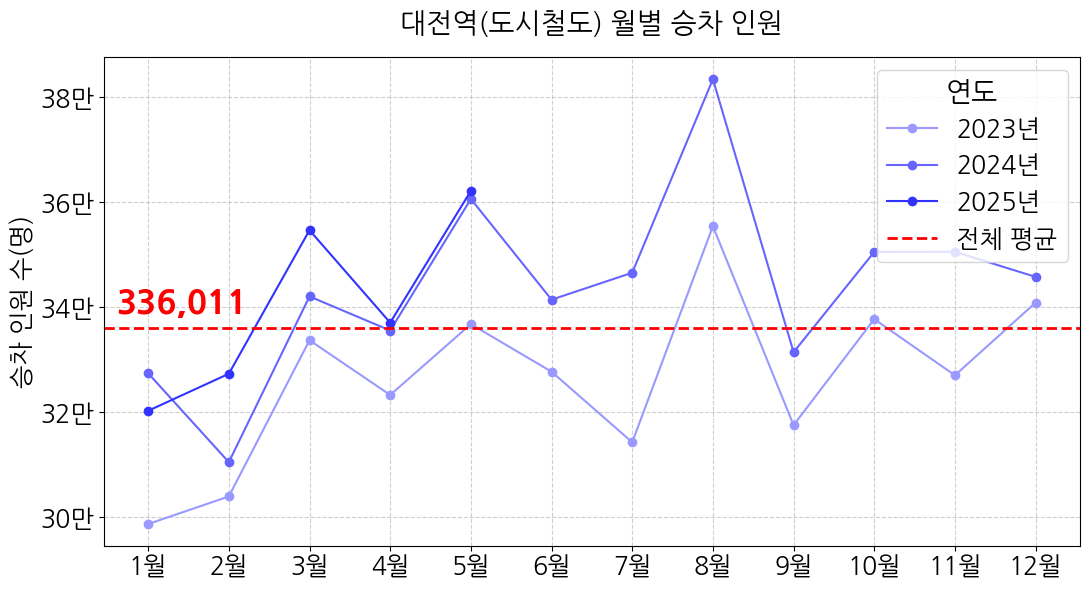

In [ ]:
plt.figure(figsize=(11, 6))
plt.rc('font', family='NanumGothic')

colors = [(0.6, 0.6, 1), (0.4, 0.4, 1), (0.2, 0.2, 1)]

# 각 연도별로 꺾은선 그래프 그리기
for i, year in enumerate(df_DJst.index):
    plt.plot(df_DJst.columns, df_DJst.loc[year], marker='o', label=f'{year}년', color = colors[i])

plt.title('대전역(도시철도) 월별 승차 인원', fontsize = 20, pad = 18)
plt.ylabel('승차 인원 수(명)', fontsize = 18)
plt.xticks(fontsize = 18, rotation = 0)
plt.yticks(fontsize = 18)

# 전체 평균 선 그리기
overall_avg = np.nanmean(df_DJst.values)
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=2, label='전체 평균')
plt.text(len(df_DJst.columns) - 12.4, overall_avg + 3000,
         f'{int(overall_avg):,}', color = 'red', fontsize = 24, fontweight = 'bold')

plt.grid(True, linestyle = '--', alpha = 0.6)
plt.legend(title = '연도', title_fontsize = 20, fontsize = 18, loc='upper right') # 범례

# y축에 포맷터 적용(만 단위로)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_kor_unit))

plt.tight_layout()
plt.show()

###월드컵경기장역 2025년 5월 일별 승차 인원

In [ ]:
# 파일 경로
file_path = '/content/월드컵경기장_2025년5월_일별_승하차.csv'

# 데이터 읽기
df_WCst = pd.read_csv(file_path)
df_WCst = df_WCst.set_index('날짜').T

# 열 제목 정리
df_WCst.columns = [col[-2:] for col in df_WCst.columns]

# 인덱스 정리
df_WCst.index = ['승차', '하차']
df_WCst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 승차 to 하차
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   01      2 non-null      int64
 1   02      2 non-null      int64
 2   03      2 non-null      int64
 3   04      2 non-null      int64
 4   05      2 non-null      int64
 5   06      2 non-null      int64
 6   07      2 non-null      int64
 7   08      2 non-null      int64
 8   09      2 non-null      int64
 9   10      2 non-null      int64
 10  11      2 non-null      int64
 11  12      2 non-null      int64
 12  13      2 non-null      int64
 13  14      2 non-null      int64
 14  15      2 non-null      int64
 15  16      2 non-null      int64
 16  17      2 non-null      int64
 17  18      2 non-null      int64
 18  19      2 non-null      int64
 19  20      2 non-null      int64
 20  21      2 non-null      int64
 21  22      2 non-null      int64
 22  23      2 non-null      int64
 23  24      2 non-null    

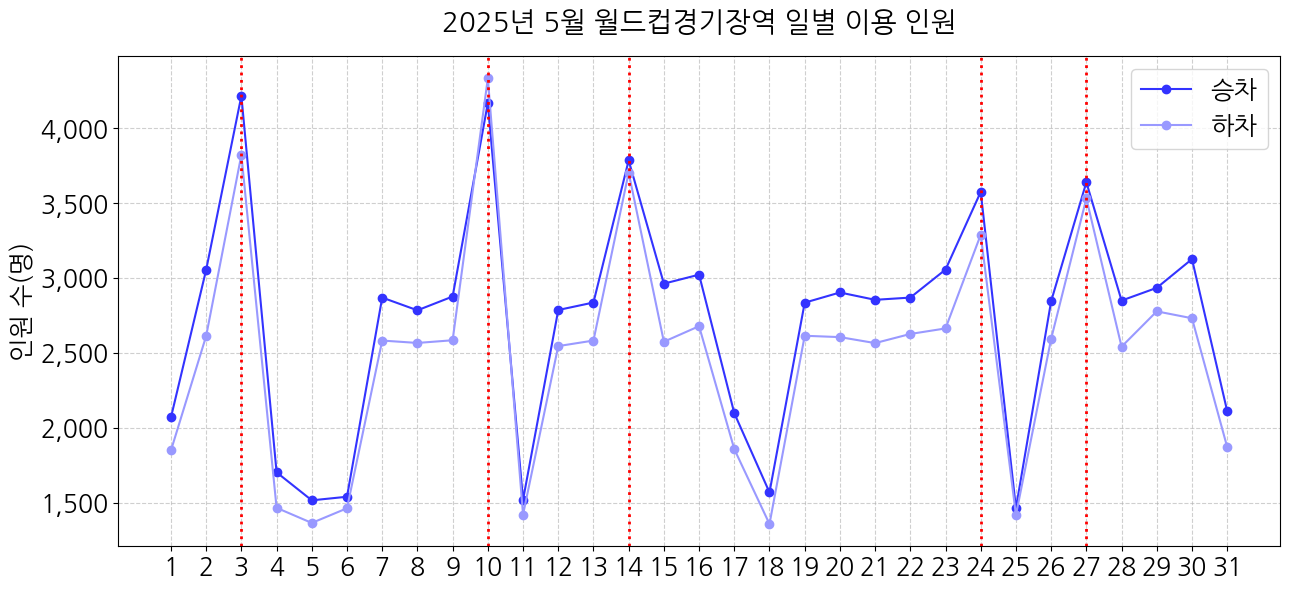

In [ ]:
plt.figure(figsize=(13, 6))
plt.rc('font', family='NanumGothic')

colors = [(0.2, 0.2, 1), (0.6, 0.6, 1)]

# x축 라벨 정리
day_labels = [f'{int(day)}' for day in df_WCst.columns]

# 각 연도별로 꺾은선 그래프 그리기
for i, year in enumerate(df_WCst.index):
    plt.plot(df_WCst.columns, df_WCst.loc[year], marker='o', label=f'{year}', color = colors[i])

plt.title('2025년 5월 월드컵경기장역 일별 이용 인원', fontsize = 20, pad = 18)
plt.ylabel('인원 수(명)', fontsize = 18)
plt.xticks(fontsize = 18, rotation = 0,
           ticks = range(len(day_labels)), labels = day_labels)
plt.yticks(fontsize = 18)

plt.grid(True, linestyle = '--', alpha = 0.6)
plt.legend(fontsize = 18, loc='upper right') # 범례

# 경기날 점선으로 표시
for idx in ['03', '10', '14', '24', '27']:
    plt.axvline(x = idx, color = 'red', linestyle = ':', linewidth = 2)

# y축값 쉼표 추가
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()